### Seam Carving

0 220
0 220
0 269
0 269
0 202
0 202


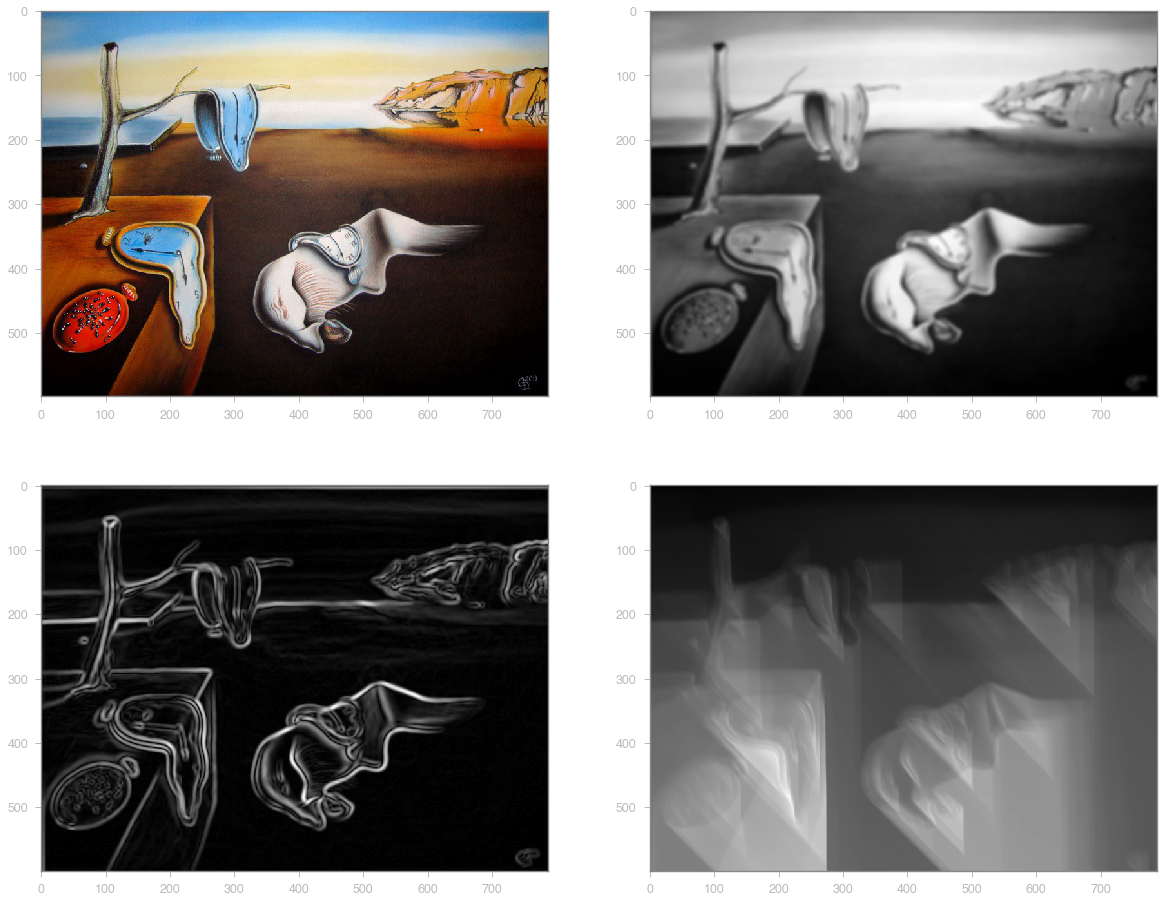

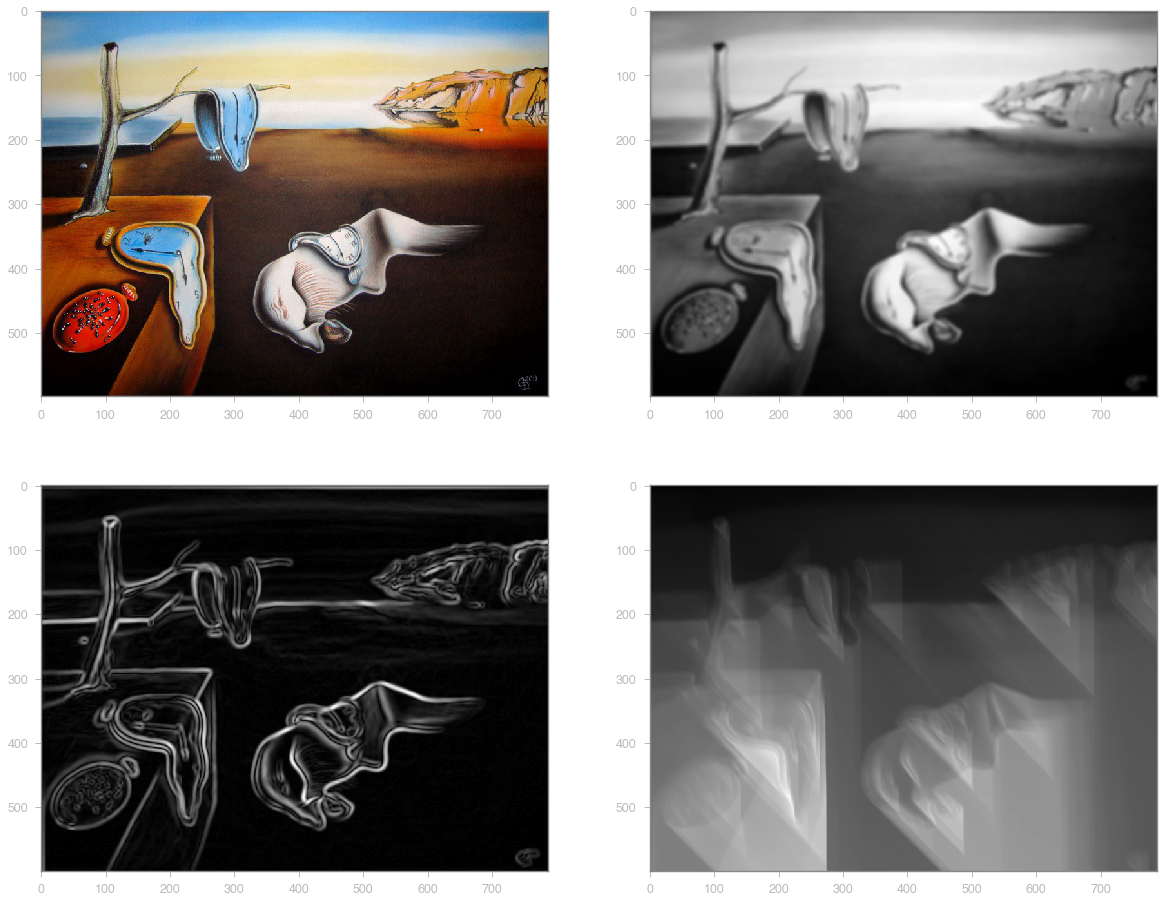

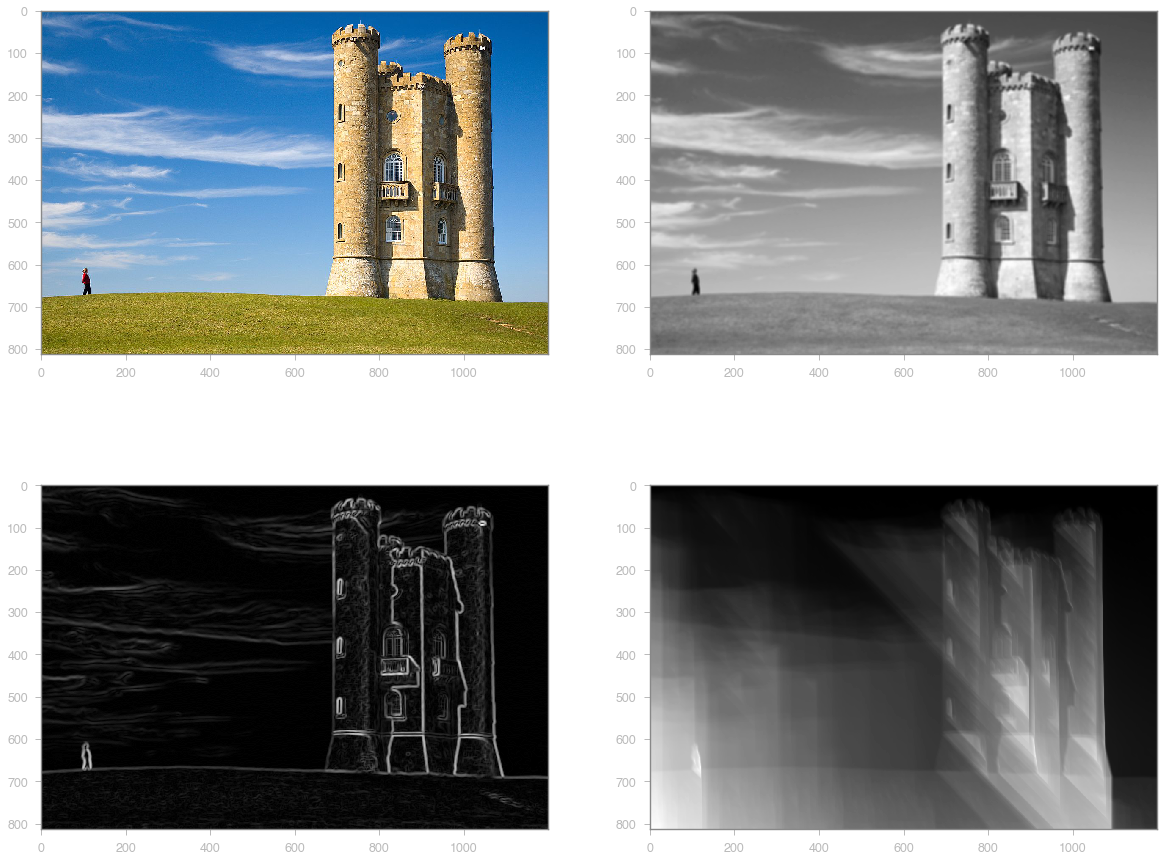

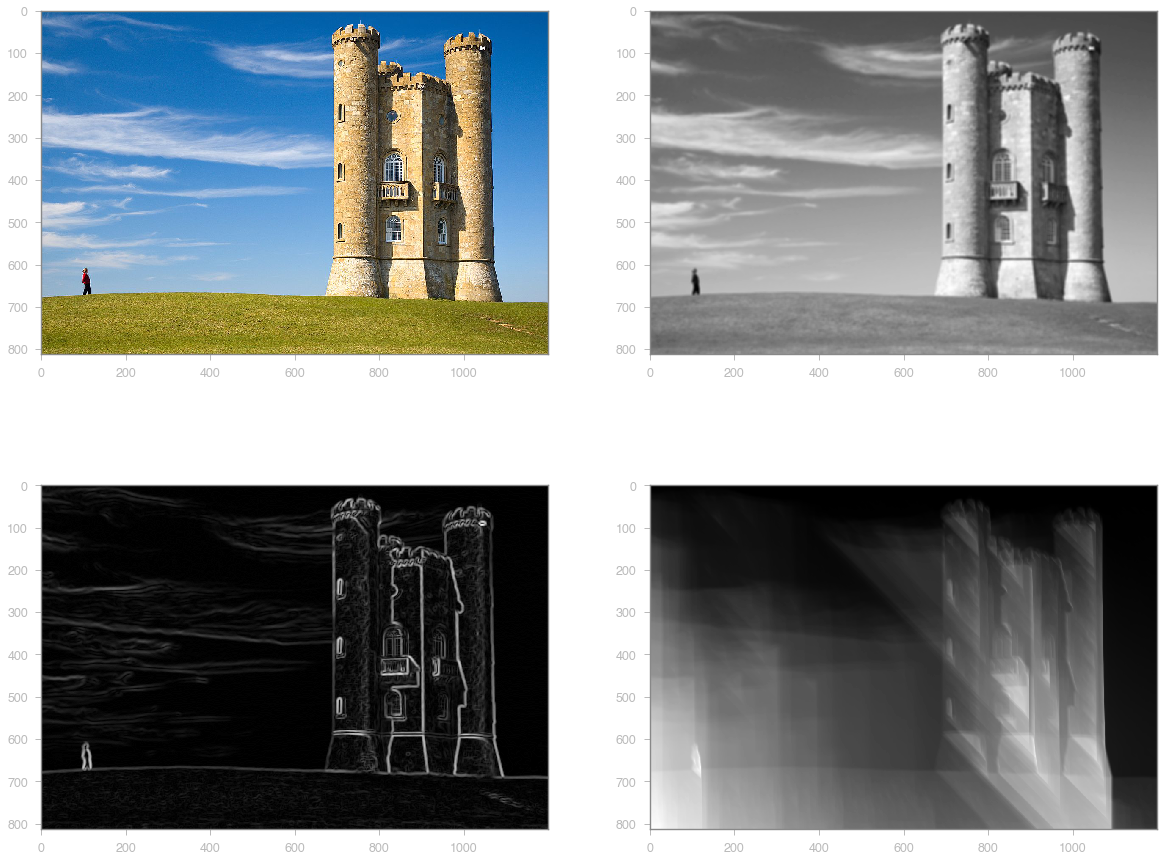

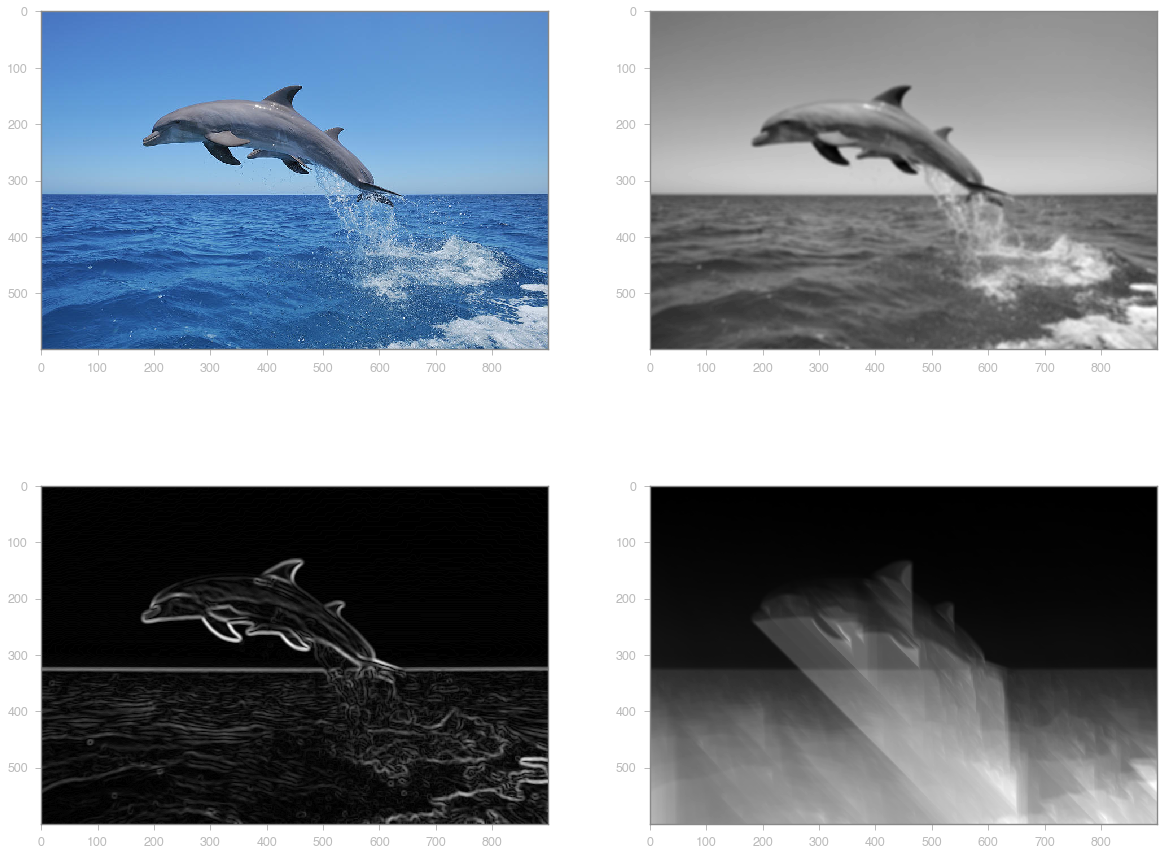

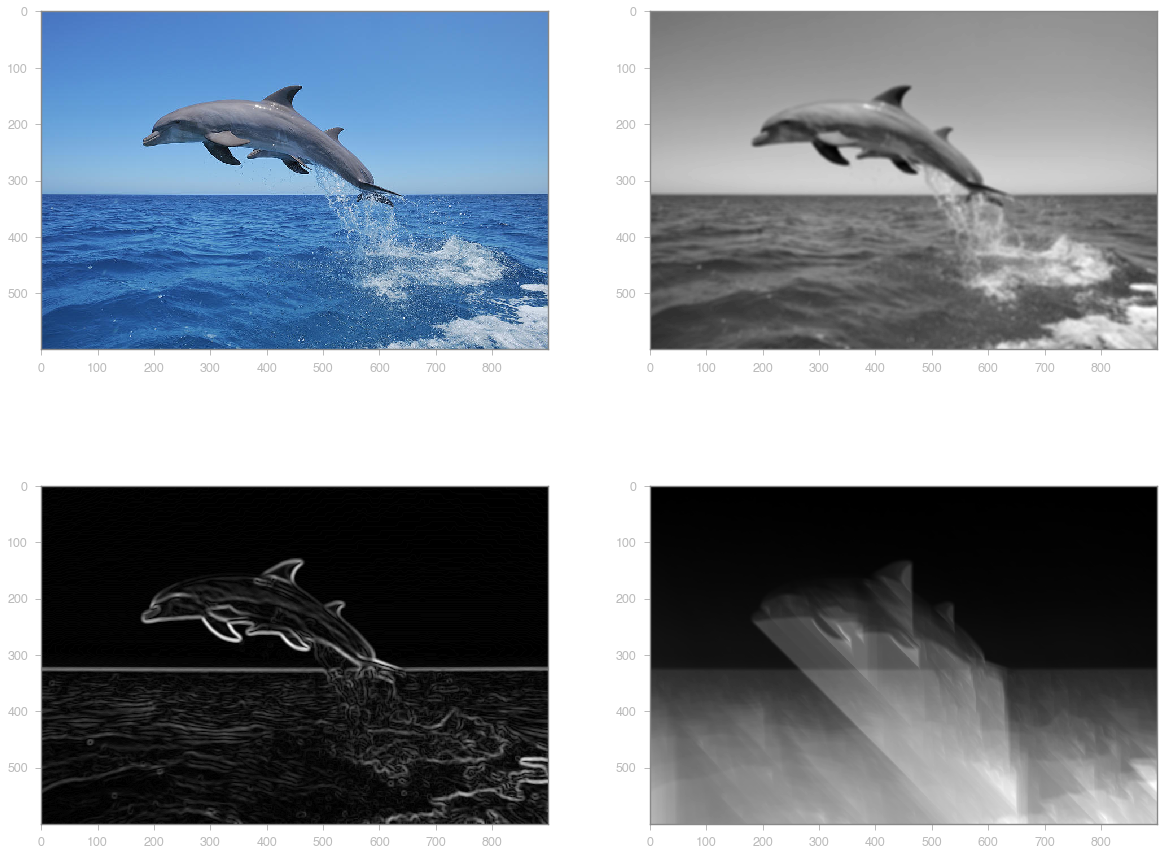

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2


def readImg(img_path):
    img_array = mpimg.imread(img_path)
    return img_array

def processImg(img_arr):
    gray = cv2.cvtColor(img_arr, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 3)
    return blur

def findEdge(gray):
    sobel_x = np.abs(cv2.Sobel(gray, 3, 1, 0)).astype(np.uint32)
    sobel_y = np.abs(cv2.Sobel(gray, 3, 0, 1)).astype(np.uint32)
    sobel = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
    return sobel.astype(np.uint32)

def findEmp(edge):
    emp = np.zeros_like(edge, dtype=np.uint32)
    emp[[0, -1],:] = edge[[0, -1],:]
    h, w = edge.shape
    for i in range(h-1):
        for j in range(w):
            left = max(0, j-1)
            right = min(w-1, j+1)
            emp[i+1, j] = np.min(emp[i, left:right] + edge[i+1, j])
    return emp

def imShow(img):
    num_img = len(img)
    x, y = 1, 1
    cmap=None
    if num_img > 1:
        x = num_img//2
        y = num_img // x

    plt.figure(figsize=(20,x*8))
    for i in range(num_img):
        if len(img[i].shape)==2:
            cmap='gray'
        plt.subplot(x,y,i+1);plt.imshow(img[i], cmap=cmap)

        
img_names = ['paint.jpg', 'tower.jpg', 'dolphine.jpg']
for img_name in img_names:
    img_array = readImg(img_name)
    gray = processImg(img_array)
    edge = findEdge(gray)
    emp = findEmp(edge)
    imShow([img_array, gray, edge, emp])

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

img = cv2.imread("tower.jpg", cv2.IMREAD_COLOR)
h, w, d = img.shape
# img = np.zeros((300,300,3), np.uint8)

cv2.namedWindow("image")
cv2.createTrackbar("x", "image", 0, w, nothing)
cv2.createTrackbar("y", "image", 0, h, nothing)
cv2.createTrackbar("Switch", "image", 0, 1, nothing)

while True:
    cv2.imshow("image", img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    x = cv2.getTrackbarPos("x", "image")
    y = cv2.getTrackbarPos("y", "image")
    s = cv2.getTrackbarPos("Switch", "image")
    if s==0:
        pass
    else:
        img = cv2.resize(img, (x,y))
cv2.destroyAllWindows()

### Seam Carving

  1. Preprocess Steps
    1. Read in Image
    2. Gray Scale Image
    3. Blur Image<br><br>
  2. Find Energy Map
    1. Edge Image
    2. Energy Map

0 10516
(813, 1200, 3) (813, 1200)
0 10516
(813, 1200, 3) (813, 1200)


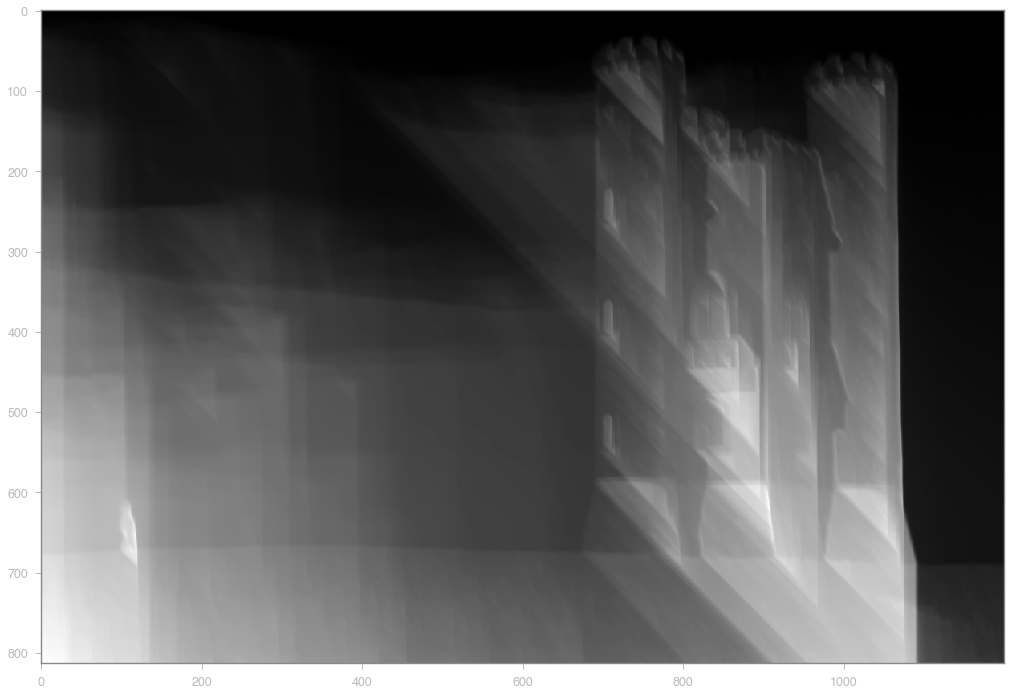

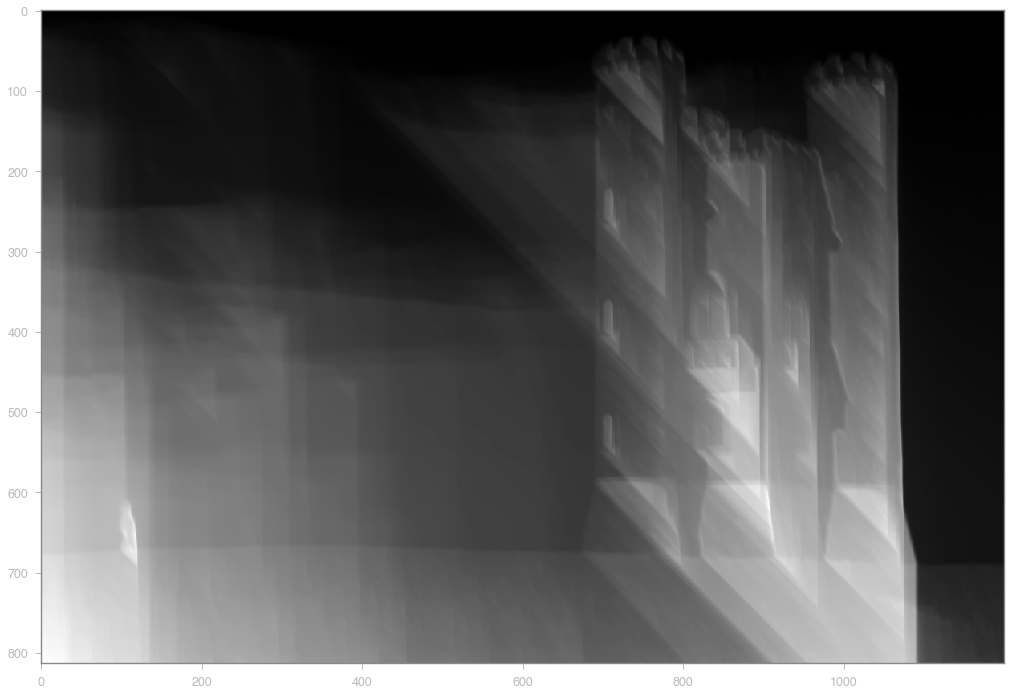

In [10]:
img_name = 'tower.jpg'

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

# read in image
img_array = mpimg.imread(img_name)
# Gray scale image
gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
# Blur image
blur = cv2.GaussianBlur(gray, (9, 9), 2)

# Find edge
sobel_x = np.abs(cv2.Sobel(blur, 3, 0, 1)).astype(np.uint64)
sobel_y  = np.abs(cv2.Sobel(blur, 3, 1, 0)).astype(np.uint64)
sobel = np.sqrt(np.square(sobel_x) + np.square(sobel_y))

# Energy map
def findEmp(edge):
    emp = np.zeros_like(edge, dtype=np.uint32)
    emp[[0, -1],:] = edge[[0, -1],:]
    h, w = edge.shape
    for i in range(h-1):
        for j in range(w):
            left = max(0, j-1)
            right = min(w-1, j+1)
            emp[i+1, j] = np.min(emp[i, left:right] + edge[i+1, j])
    return emp

emp = findEmp(sobel)
plt.figure(figsize=(20,12))
plt.imshow(emp, cmap='gray')
plt.show()